## Background

In [1]:
import pandas as pd

## Clustering Task 2 - GMM

0.05914187431335449
0.12492513656616211


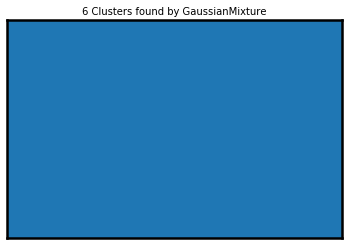

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import sklearn.mixture as mixture

import sys
sys.path.append('../resources')
import w8support as w8s

# Make sure the pic subdirectory exists
import os, errno
try:
    os.makedirs('pic')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

%matplotlib inline

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 15, 'linewidths':0}
paletteName = 'deep'
fontSize = 10
fc = '#cccccc'

featureSub = pd.read_csv("oheTransformedData.csv")
nClusters = 6

from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(featureSub)
data.shape


algName = "GaussianMixture"
for covType in ['spherical', 'full']:
    clusterParams = {'n_components':6, 'covariance_type':covType, 'max_iter':100, 'random_state':0}
    start_time = time.time()
    gaussianMixture = mixture.GaussianMixture(**clusterParams)
    #print(dir(gaussianMixture))
    labels = gaussianMixture.fit(data).predict(data)
    
    # Add cluster labels to original dataframe for review and interpretation of cluster results.
    featureSub['cluster'] = labels 
    
    # Subsequently, this will be invoked using a function call of the form
    # gaussianMixture, labels = w8s.fitClusterLabels(data, mixture.GaussianMixture, (), clusterParams)
    end_time = time.time()
    elapsed_time = end_time-start_time
    print(elapsed_time)
    #plt, elapsed_time = w8s.plot_clusters(data, mixture.GaussianMixture, (), clusterParams, plot_kwds)
    
    plt.clf() # Start new plot
    title = '{} Clusters found by {}'.format(str(nClusters),algName)
    plt = w8s.plot_2dClusters(data, labels, title, paletteName, fontSize, plot_kwds)
    outFile = 'pic/{}{}_{}_generated.pdf'.format(algName,str(nClusters),covType)
    plt.savefig(outFile)

    title = '{} Clusters (with regions) found by {}'.format(str(nClusters),algName)
    weights = gaussianMixture.weights_
    means = gaussianMixture.means_
    covariances = gaussianMixture.covariances_
    plt = w8s.overlayEllipses(plt, weights, means, covariances)
    outFile = 'pic/{}{}_{}_withEllipses_generated.pdf'.format(algName,str(nClusters),covType)
    plt.savefig(outFile)

In [3]:
featureSub.head(50)

,Years_on_Internet-0,Years_on_Internet-1,Years_on_Internet-2,Years_on_Internet-3,Years_on_Internet-4,Web_Ordering-0,Web_Ordering-1,Web_Ordering-2,Not_Purchasing_Privacy,Not_Purchasing_Prefer_people,Not_Purchasing_Too_complicated,Not_Purchasing_Easier_locally,Not_Purchasing_Security,Age,cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,41.0,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,1,28.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1,0,25.0,5
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,28.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,17.0,1
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,0,55.0,4
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,53.0,4
7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,1,25.0,3
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1,1,32.0,0
9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,65.0,2
